In [1]:
import matplotlib.pyplot as plt # pernyataan impor yang mengimpor modul pyplot dari pustaka matplotlib.
import seaborn as sns; sns.set() # pernyataan impor yang mengimpor modul seaborn dari pustaka Seaborn.
import numpy as np # Ini adalah pernyataan impor yang mengimpor pustaka numpy dan memberi alias np ke pustaka tersebut

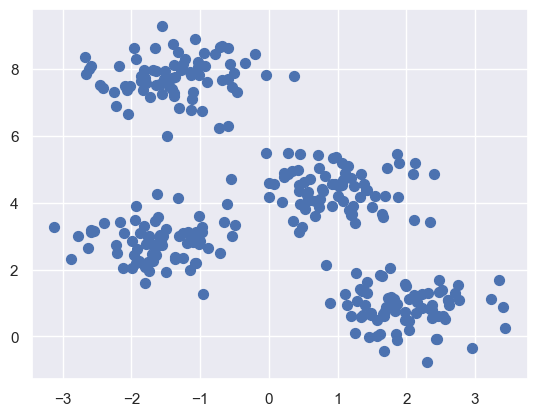

In [3]:
from sklearn.datasets import make_blobs # pernyataan impor yang mengimpor fungsi make_blobs dari modul datasets dalam pustaka Scikit-Learn.

X, y_true = make_blobs(n_samples=300, centers=4, # fungsi make_blobs mengatur jumlah total 300 sampel dan 4 klaster
                       cluster_std=0.60, random_state=0) # mengatur standar deviasi (spread) dari setiap klaster dan seed untuk generator angka acak
plt.scatter(X[:, 0], X[:, 1], s=50); # digunakan untuk membuat scatter plot
                                     # kolom pertama dan kedua dari data X dengan ukuran titik pada plot menjadi 50.

In [4]:
from sklearn.cluster import KMeans # impor yang mengimpor kelas KMeans dari modul cluster dalam pustaka Scikit-Learn.
kmeans = KMeans(n_clusters=4) # mengatur jumlah klaster menjadi 4 klaster
kmeans.fit(X) #  untuk melatih (fit) model K-Means pada data X.
y_kmeans = kmeans.predict(X) # untuk memprediksi klaster untuk setiap sampel dalam data X

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


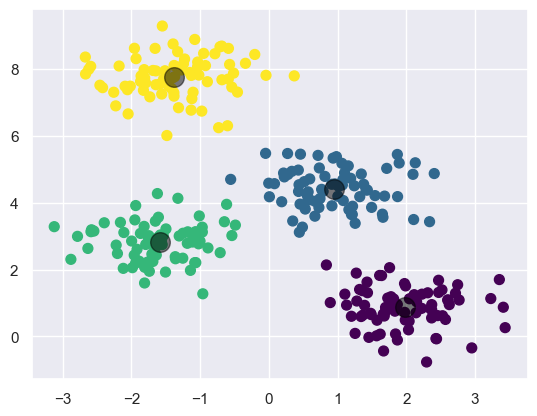

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# membuat scatter plot dari data X kolom pertama dan kedua 
# c=y_kmeans mengatur warna titik-titik berdasarkan label klaster yang disimpan dalam y_kmeans
# s=50 mengatur ukuran titik pada plot menjadi 50.
# cmap='viridis' adalah pilihan peta warna yang digunakan untuk mengatur cara warna klaster digambarkan pada plot.

centers = kmeans.cluster_centers_ # mengambil koordinat pusat klaster (centroid)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
# membuat scatter plot yang mengacu pada koordinat pusat klaster dalam kolom pertama dan kedua.
# c='black' mengatur warna titik pusat klaster menjadi hitam.
# s=200 mengatur ukuran titik pusat klaster menjadi 200.
# alpha=0.5 mengatur tingkat transparansi pusat klaster sehingga titik pusat klaster tidak sepenuhnya menutupi titik data.

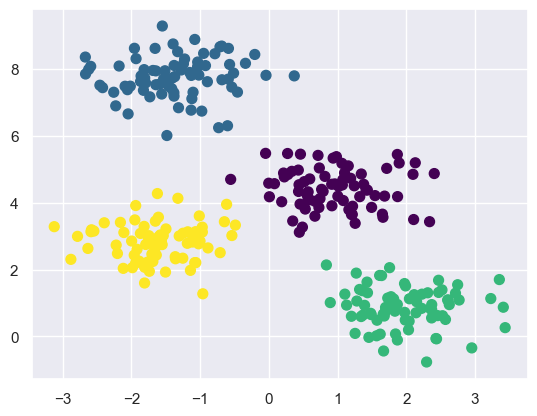

In [6]:
from sklearn.metrics import pairwise_distances_argmin
# impor yang mengimpor fungsi pairwise_distances_argmin dari pustaka Scikit-Learn.

def find_clusters(X, n_clusters, rseed=2): # mengambil tiga parameter
                                           # (Data klaster, jumlah klaster, Seed untuk generator angka acak)
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4) # melakukan klastering pada data X menjadi 4 klaster.
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
# membuat scatter plot dari data X kolom pertama dan kedua, memberi warna titik-titik berdasarkan label klaster yang disimpan dalam labels
# dan mengatur ukuran titik pada plot menjadi 50.

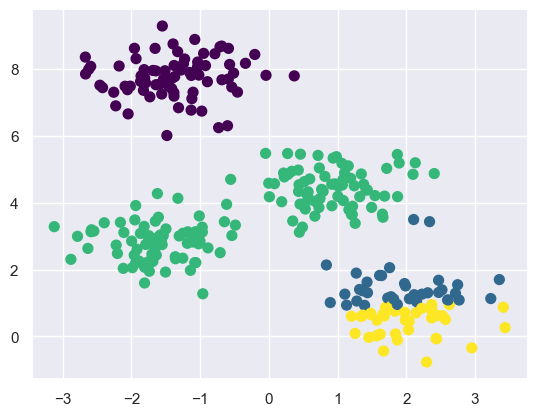

In [7]:
centers, labels = find_clusters(X, 4, rseed=0) # menggunakan fungsi find_clusters untuk melakukan klastering pada data X menjadi 4 klaster
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
# membuat scatter plot dari data X kolom pertama dan kedua memberi warna titik-titik berdasarkan label klaster yang disimpan dalam labels
# dan mengatur ukuran titik pada plot menjadi 50.
# cmap='viridis' adalah pilihan peta warna yang digunakan untuk mengatur cara warna klaster digambarkan pada plot.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


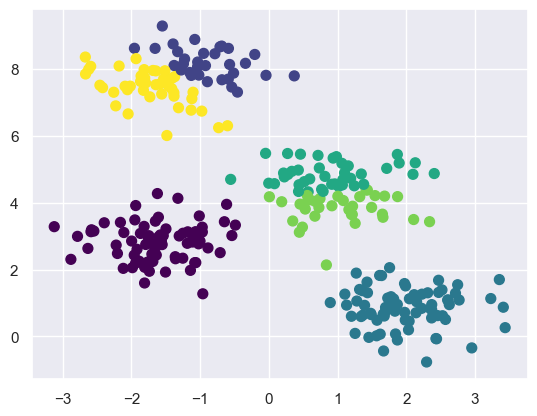

In [8]:
labels = KMeans(6, random_state=0).fit_predict(X) # menggunakan algoritma K-Means dengan 6 klaster.
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
# membuat scatter plot dari data X kolom pertama dan kedua memberi warna titik-titik berdasarkan label klaster yang disimpan dalam labels
# dan mengatur ukuran titik pada plot menjadi 50.
# cmap='viridis' adalah pilihan peta warna yang digunakan untuk mengatur cara warna klaster digambarkan pada plot.

In [9]:
from sklearn.datasets import make_moons # mengimpor fungsi make_moons dari modul datasets dalam pustaka Scikit-Learn.
X, y = make_moons(200, noise=.05, random_state=0)
# membuat dataset sintetis dengan 200 sampel dan juga mengontrol sejauh mana titik-titik dalam dataset akan tersebar
# mengatur seed untuk generator angka acak

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


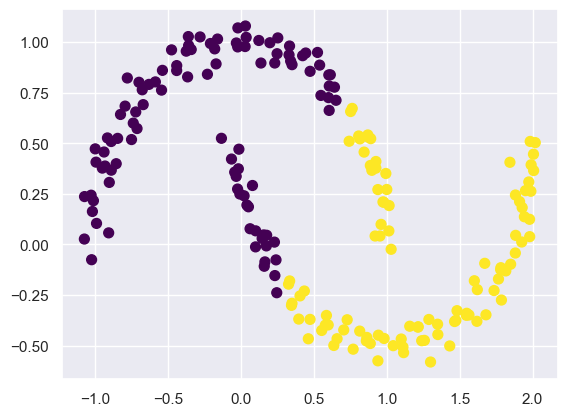

In [10]:
labels = KMeans(2, random_state=0).fit_predict(X) # melakukan klastering pada data X menggunakan algoritma K-Means dengan 2 klaster.
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
# membuat scatter plot dari data X kolom pertama dan kedua memberi warna titik-titik berdasarkan label klaster yang disimpan dalam labels
# dan mengatur ukuran titik pada plot menjadi 50.
# cmap='viridis' adalah pilihan peta warna yang digunakan untuk mengatur cara warna klaster digambarkan pada plot.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


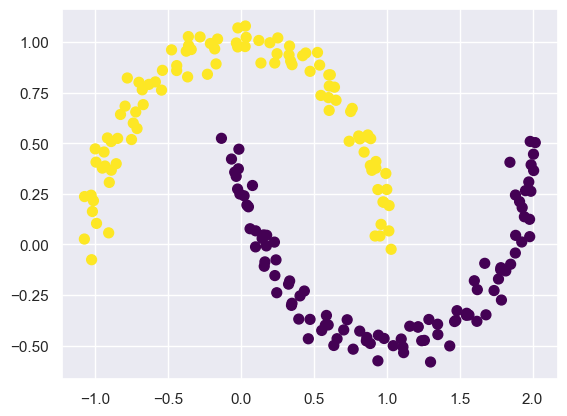

In [11]:
from sklearn.cluster import SpectralClustering # impor yang mengimpor kelas SpectralClustering
                                               # untuk melakukan klastering menggunakan algoritma Spectral Clustering.
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', # affinity='nearest_neighbors' mengatur jenis matriks jarak (affinity) yang akan digunakan untuk mengukur jarak antara titik-titik data
                           assign_labels='kmeans') # mengatur algoritma yang digunakan untuk menetapkan label klaster 
labels = model.fit_predict(X) # metode yang digunakan untuk melatih model Spectral Clustering pada data X
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [12]:
from sklearn.datasets import load_digits # proses impor, Fungsi load_digits digunakan untuk memuat dataset yang berisi gambar-gambar digit tulisan tangan (0 hingga 9) 
digits = load_digits() # untuk memuat dataset digit tulisan tangan.
digits.data.shape # digunakan untuk mengakses atribut data dari objek digits, yang berisi data gambar digit.
                  # .shape digunakan untuk mengetahui ukuran (jumlah baris dan kolom) dari matriks data gambar digit.

(1797, 64)

In [13]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
# menginisialisasi objek model K-Means untuk melakukan klastering
# dengan mengatur jumlah klaster (10 klaster)

clusters = kmeans.fit_predict(digits.data) 
# metode yang digunakan untuk melatih model K-Means pada data digits.data dan sekaligus memprediksi klaster untuk setiap sampel gambar digit.
kmeans.cluster_centers_.shape

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

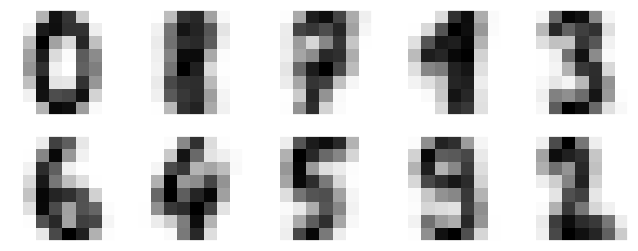

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
# fig adalah objek figur, dan ax adalah array yang berisi semua subplot yang telah dibuat.
# figsize=(8, 3) mengatur ukuran figur yang akan digunakan untuk menampilkan subplot.

centers = kmeans.cluster_centers_.reshape(10, 8, 8)
# Ada 10 pusat klaster, dan masing-masing pusat klaster berukuran 8x8. 
for axi, center in zip(ax.flat, centers):
# axi adalah subplot yang sedang diproses pada iterasi saat ini, dan
# center adalah pusat klaster yang sesuai dengan iterasi tersebut.
    axi.set(xticks=[], yticks=[]) # menghapus tanda sumbu (ticks) pada subplot. 

    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    # digunakan untuk menampilkan gambar pusat klaster pada subplot.
    # center adalah matriks gambar pusat klaster yang sedang diproses pada iterasi saat ini.
    # interpolation='nearest' mengatur metode interpolasi gambar. 
    # cmap=plt.cm.binary mengatur peta warna yang digunakan untuk gambar. 

In [15]:
from scipy.stats import mode # mengimpor fungsi mode dari modul stats dalam pustaka SciPy.

labels = np.zeros_like(clusters) # larik labels dengan ukuran yang sama seperti larik clusters
for i in range(10): #looping
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

C:\Users\Maidy Putri Joshi\AppData\Local\Temp\ipykernel_6024\1054570171.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels) # membandingkan label sebenarnya dengan label yang di-assign oleh model K-Means dan menghitung persentase sampel yang diklasifikasikan dengan benar.

0.7918753478018921

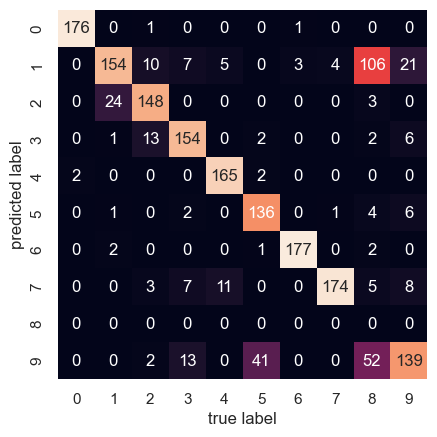

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [19]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Maidy Putri Joshi\AppData\Local\Temp\ipykernel_6024\4118165493.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.9415692821368948

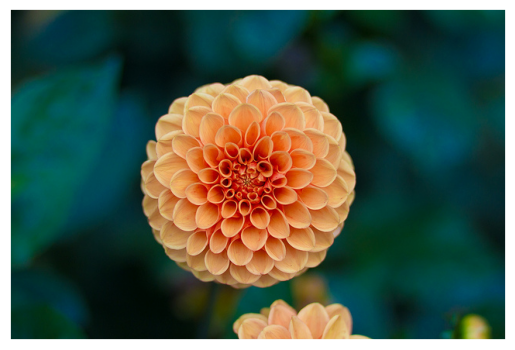

In [20]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [21]:
flower.shape

(427, 640, 3)

In [22]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [23]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

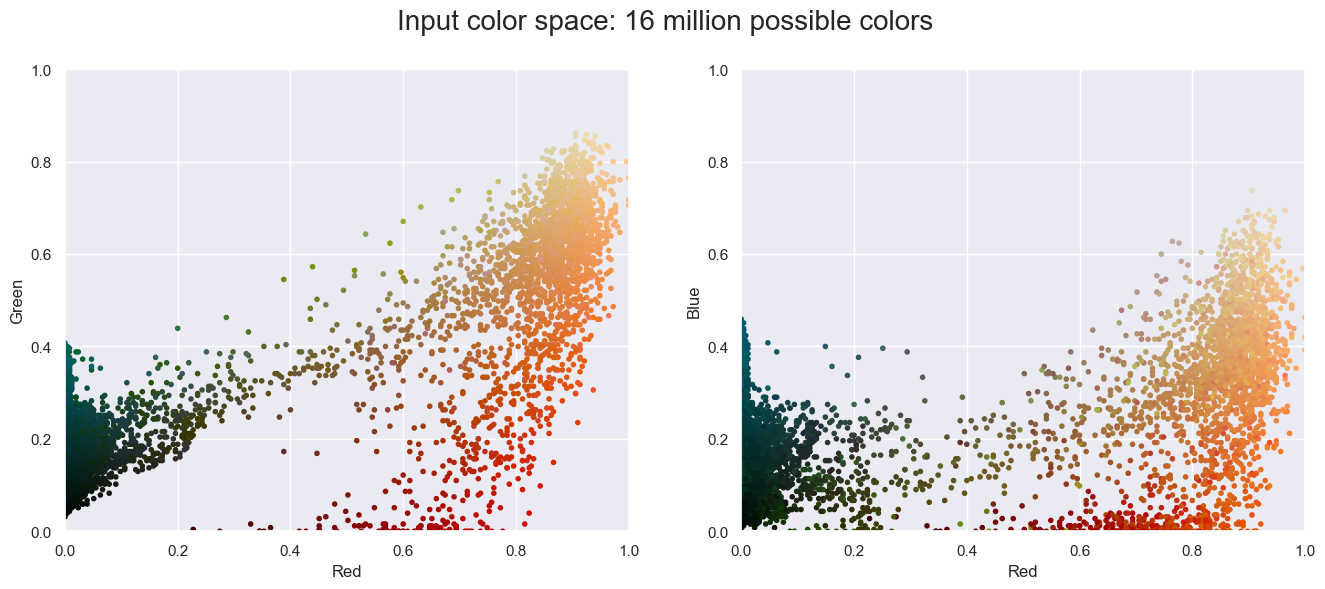

In [24]:
plot_pixels(data, title='Input color space: 16 million possible colors')

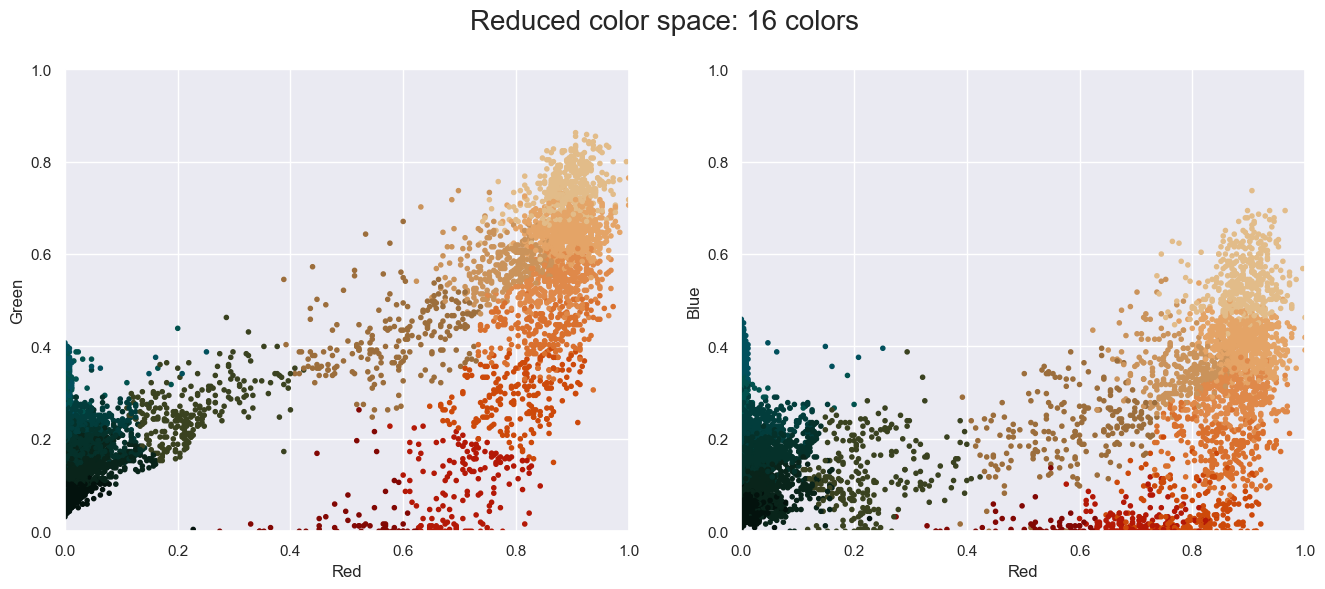

In [25]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

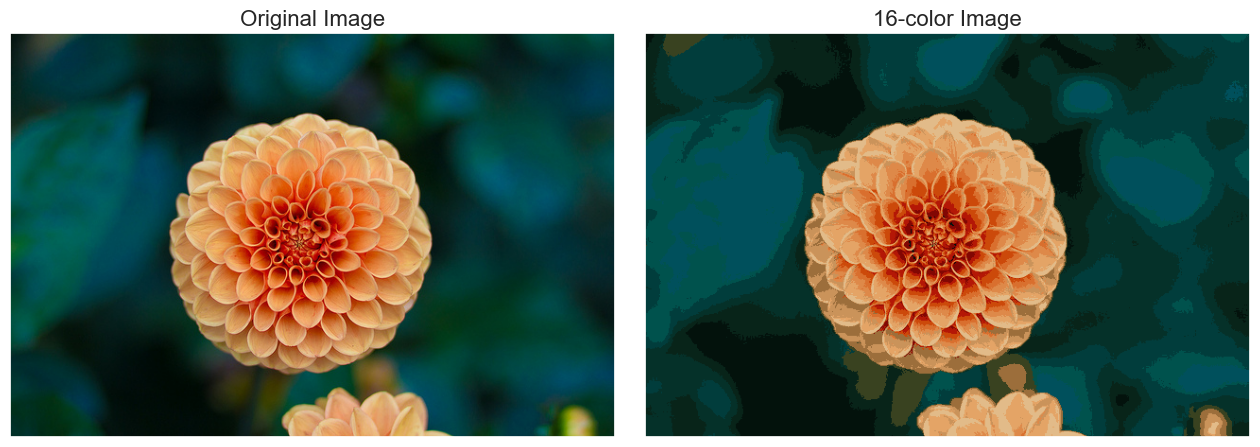

In [26]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);